<a href="https://colab.research.google.com/github/Juuphaada/Machine-Learning-Study/blob/main/Classifying_Hipertension_Arterial_Mexico_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
!pip install scikeras[tensorflow]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 40.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully un

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import numpy as np

In [ ]:
# อ่านข้อมูลจากไฟล์ CSV
#csv_file_path = "/content/drive/MyDrive/ปี 3/วิจัย/งานกลุ่ม/Hipertension Arterial Mexico Data Set/Hipertension_Arterial_Mexico.csv"
csv_file_path = "/content/Hipertension_Arterial_Mexico.csv"
data = pd.read_csv(csv_file_path)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FOLIO_I                           4363 non-null   object 
 1   sexo                              4363 non-null   int64  
 2   edad                              4363 non-null   int64  
 3   concentracion_hemoglobina         4363 non-null   float64
 4   temperatura_ambiente              4363 non-null   int64  
 5   valor_acido_urico                 4363 non-null   float64
 6   valor_albumina                    4363 non-null   float64
 7   valor_colesterol_hdl              4363 non-null   int64  
 8   valor_colesterol_ldl              4363 non-null   float64
 9   valor_colesterol_total            4363 non-null   int64  
 10  valor_creatina                    4363 non-null   float64
 11  resultado_glucosa                 4363 non-null   float64
 12  valor_

In [ ]:
# ตัด'FOLIO_I'ออก (IDคนไข้ ไม่ใช้ในการ predict)
X = data[['sexo', 'edad', 'concentracion_hemoglobina','temperatura_ambiente', 'valor_acido_urico', 'valor_albumina',
          'valor_colesterol_hdl', 'valor_colesterol_ldl', 'valor_colesterol_total', 'valor_creatina', 'resultado_glucosa',
          'valor_insulina', 'valor_trigliceridos', 'resultado_glucosa_promedio', 'valor_hemoglobina_glucosilada',
          'valor_ferritina', 'valor_folato', 'valor_homocisteina', 'valor_proteinac_reactiva', 'valor_transferrina',
          'valor_vitamina_bdoce', 'valor_vitamina_d', 'peso', 'estatura', 'medida_cintura', 'segundamedicion_peso',
          'segundamedicion_estatura', 'distancia_rodilla_talon', 'circunferencia_de_la_pantorrilla', 'segundamedicion_cintura',
          'tension_arterial', 'sueno_horas', 'masa_corporal', 'actividad_total']]
# riesgo_hipertension (ผลการทำนายความเสี่ยงที่จะเป็นโรค 0=ไม่เสี่ยงโรค , 1=ไม่เสี่ยงโรค)
y = data['riesgo_hipertension']

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# สร้างและฝึกโมเดล CNN (Convolutional Neural Networks)
def create_cnn_model():
    model = Sequential()
    # เพิ่มเลเยอร์ Convolutional
    # Dense : เดิมเป็น 64 เปลี่ยนเป็น 10 node,
    # input_dim : 34 จำนวนตาม colum ของ X (จำนวน feature ใน X)
    model.add(Dense(10, input_dim=34, activation='relu'))

    # Dense เคยตั้งเป็น5แล้ว cross_val ออกมาได้แค่ 0.8 กว่าๆ
    model.add(Dense(2, activation='softmax'))  # 3 คลาสใน output layer

    # คอมไพล์โมเดล
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# สร้างและฝึกโมเดล SVM
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
svm_scores = cross_val_score(svm_model, X, y, cv=stratified_kfold)

In [ ]:
# สร้างและฝึกโมเดล Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=stratified_kfold)

In [ ]:
# สร้างและฝึกโมเดล K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_scores = cross_val_score(knn_model, X, y, cv=5)

In [ ]:
print(f'SVM Cross-Validation Scores: {np.mean(svm_scores)}')
print(f'Random Forest Cross-Validation Scores: {np.mean(rf_scores)}')
print(f'K-Nearest Neighbors Cross-Validation Scores: {np.mean(knn_scores)}')

SVM Cross-Validation Scores: 0.8494159651943629
Random Forest Cross-Validation Scores: 0.9889979192282228
K-Nearest Neighbors Cross-Validation Scores: 0.8597299725716449


In [ ]:
# CNN
cnn_model = KerasClassifier(build_fn=create_cnn_model, epochs=100, batch_size=10, verbose=0)
cnn_scores = cross_val_score(cnn_model, X.values, y.values, cv=5)

print(f'CNN Cross-Validation Scores: {np.mean(cnn_scores)}')

<ipython-input-55-f3517e1c4091>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cnn_model = KerasClassifier(build_fn=create_cnn_model, epochs=100, batch_size=10, verbose=0)


CNN Cross-Validation Scores: 0.8895312428474427


##สร้างmodel โดยใช้การตั้งค่าที่ได้หลังการทำ model tuning
- หาคะแนน cross validation กับชุด train
- ทดสอบ model กับข้อมูล test
- เทียบค่า

In [ ]:
rf_model_allf = RandomForestClassifier(bootstrap = False,
                                       max_depth = 20 ,
                                       max_features = 10,
                                       min_samples_leaf = 4,
                                       min_samples_split = 10,
                                       n_estimators=1000,
                                       random_state=42)
# cross validation
rf_scores = cross_val_score(rf_model_allf, X_train, y_train, cv=stratified_kfold)
rf_f1score = cross_val_score(rf_model_allf, X_train, y_train,scoring="f1",cv=stratified_kfold,)

# final result
rf_model_allf.fit(X_train, y_train)
y_rf_predict= rf_model_allf.predict(X_test)

# cross validation vs final result
print(f'Random Forest Cross-Validation Scores: {np.mean(rf_scores)}, f1_score: {np.mean(rf_f1score)}')
print(f'Random Forest Test Scores: {accuracy_score(y_test,y_rf_predict)}, f1_score: {f1_score(y_test,y_rf_predict)}')

In [ ]:
def create_ann_model():
    model = Sequential()
    # เพิ่มเลเยอร์ Convolutional,
    # input_dim : 34 จำนวนตาม colum ของ X (จำนวน feature ใน X)
    model.add(Dense(units=10, input_dim=34, activation='relu'))

    # Dense เคยตั้งเป็น5แล้ว cross_val ออกมาได้แค่ 0.8 กว่าๆ
    model.add(Dense(units=2, activation='softmax'))

    # คอมไพล์โมเดล
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)

# cross validation
ann_scores = cross_val_score(ann_model, X_train, y_train, cv=stratified_kfold)
ann_f1scores = cross_val_score(ann_model, X_train, y_train, scoring="f1", cv=stratified_kfold)

# final result
ann_model.fit(X_train, y_train)
y_ann_predict = ann_model.predict(X_test)

# cross validation vs final result
print(f'ANN Cross-Validation Scores: {np.mean(ann_scores)}, f1_score: {np.mean(knn_f1score)}')
print(f'ANN Test Scores: {accuracy_score(y_test,y_ann_predict)}, f1_score: {f1_score(y_test,y_ann_predict)}')

<ipython-input-45-b637e86ea09c>:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cnn_model_allf = KerasClassifier(build_fn=create_cnn_model, epochs=100, batch_size=10, verbose=0)


In [ ]:
%%time
svm_model_allf = make_pipeline(StandardScaler(), SVC(C = 3, gamma= 'scale', kernel= 'rbf'))

# cross validation
svm_scores = cross_val_score(svm_model_allf, X_train, y_train, cv=stratified_kfold)
svm_f1scores = cross_val_score(svm_model_allf, X_train, y_train,scoring="f1",cv=stratified_kfold,)

# final result
svm_model_allf.fit(X_train, y_train)
y_svm_predict = svm_model_allf.predict(X_test)

# cross validation vs final result
print(f'SVM Cross-Validation Scores: {np.mean(svm_scores)}, f1_score: {np.mean(svm_f1scores)}')
print(f'SVM Test Scores: {accuracy_score(y_test,y_svm_predict)}, f1_score: {f1_score(y_test,y_svm_predict)}')

CPU times: user 1.61 s, sys: 1.35 ms, total: 1.61 s
Wall time: 1.62 s


In [ ]:
%%time
knn_model_allf = KNeighborsClassifier(algorithm='auto', n_neighbors=8, weights = 'distance', p = 1)
# cross validation
knn_scores = cross_val_score(knn_model_allf, X_train, y_train, cv=stratified_kfold)
knn_f1score = cross_val_score(knn_model_allf, X_train, y_train,scoring="f1",cv=stratified_kfold,)

# final result
knn_model_allf.fit(X_train, y_train)
y_knn_predict= knn_model_allf.predict(X_test)

# cross validation vs final result
print(f'ANN Cross-Validation Scores: {np.mean(ann_scores)}, f1_score: {np.mean(knn_f1score)}')
print(f'ANN Test Scores: {accuracy_score(y_test,y_knn_predict)}, f1_score: {f1_score(y_test,y_knn_predict)}')

CPU times: user 1.06 s, sys: 1.94 ms, total: 1.06 s
Wall time: 558 ms


In [ ]:
print(f'SVM Cross-Validation Scores: {np.mean(svm_scores)}, f1_score: {np.mean(svm_f1scores)}')
print(f'Random Forest Cross-Validation Scores: {np.mean(rf_scores)}, f1_score: {np.mean(rf_f1score)}')
print(f'K-Nearest Neighbors Cross-Validation Scores: {np.mean(knn_scores)}, f1_score: {np.mean(knn_f1score)}')
print(f'ANN Cross-Validation Scores: {np.mean(ann_scores)}, f1_score: {np.mean(knn_f1score)}')

SVM Cross-Validation Scores: 0.8578966865285791
Random Forest Cross-Validation Scores: 0.9954152085500804
K-Nearest Neighbors Cross-Validation Scores: 0.8886061981777484


##โชว์ผลลัพธ์ กราฟ

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

acc_scores = {'models':['Support Vector Machine','Random Forest','K-nearest neighbor','Convolutional Neural Network'],
              'score':[0.9048176455736877,0.9997590029608208,0.9284066652895406,0.9245937478482407]}
acc_scores = pd.DataFrame(acc_scores)
acc_scores.set_index('models')
acc_scores

,models,score
0,Support Vector Machine,0.904818
1,Random Forest,0.999759
2,K-nearest neighbor,0.928407
3,Convolutional Neural Network,0.924594


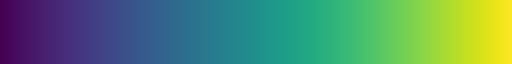

In [ ]:
# @title
import matplotlib as mpl
mpl.colormaps['viridis']
#https://matplotlib.org/stable/users/explain/colors/colormaps.html

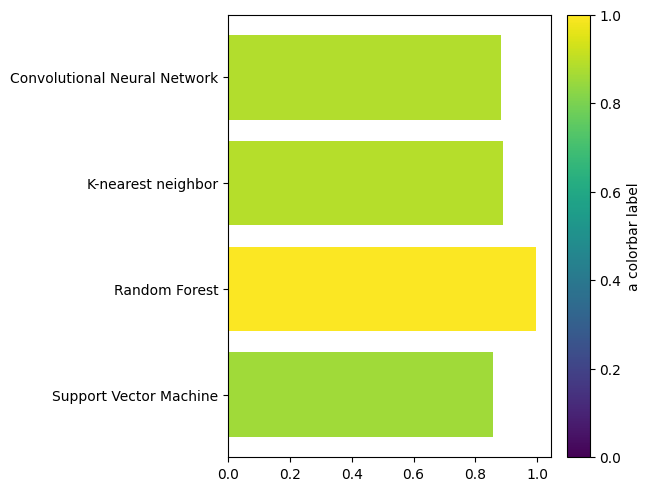

In [ ]:
# @title
fig, ax = plt.subplots(layout='constrained')

my_cmap = plt.get_cmap("viridis")
ax.barh(acc_scores['models'],acc_scores['score'],color=my_cmap(acc_scores['score']))
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 1), cmap='viridis'),
             ax=ax, orientation='vertical', label='a colorbar label')
#https://stackoverflow.com/questions/64068659/bar-chart-in-matplotlib-using-a-colormap

In [ ]:
len(acc_scores['score'])

4

In [ ]:
acc_scores['score']

0    0.857897
1    0.995415
2    0.888606
3    0.884029
Name: score, dtype: float64

In [ ]:
#plt.barh(acc_scores['models'],acc_scores['score'], color=bar_colors)
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py
#https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

In [ ]:
[i for i in range(len(acc_scores['score']))]

[0, 1, 2, 3]

In [ ]:
#ลบ frame ออกหมดเลย
#fig.patch.set_visible(False)
#ax.axis('on')
#ax.set_frame_on(False) # remove the frame

<BarContainer object of 4 artists>

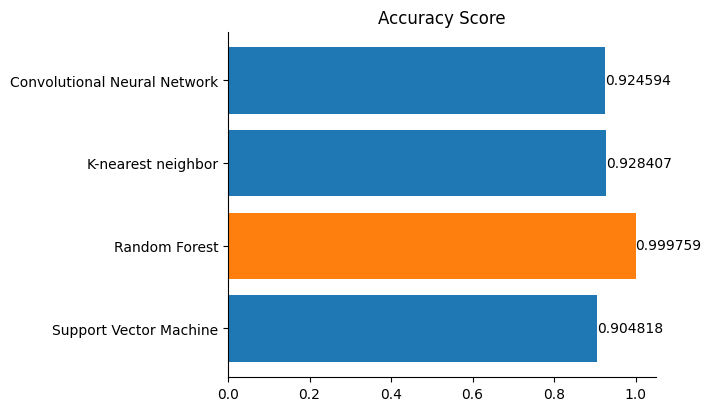

In [ ]:
bar_colors = ['tab:blue', 'tab:orange', 'tab:blue', 'tab:blue']
fig, ax = plt.subplots(figsize=(7, 4),layout='constrained')

#for spine in ax.spines.values():
#    spine.set_visible(False) # remove all spines

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title('Accuracy Score')

bars = ax.barh( [i for i in range(len(acc_scores['score']))] , acc_scores['score'])
ax.bar_label(bars)
ax.barh(acc_scores['models'],acc_scores['score'],color=bar_colors)

#Test

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

CPU times: user 498 ms, sys: 10.8 ms, total: 509 ms
Wall time: 508 ms


Text(0.5, 1.0, 'Support Vector Machine')

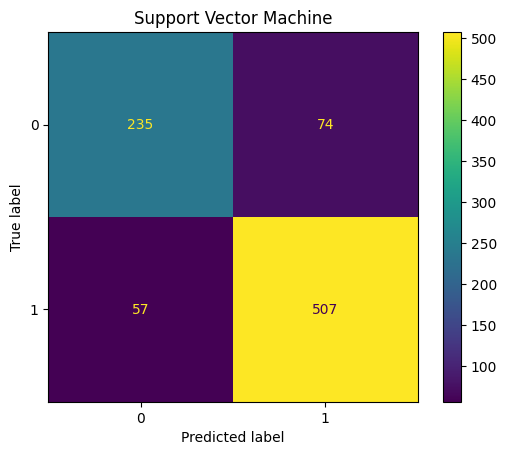

In [ ]:
%%time
svm_model_allf.fit(X_train,y_train)
ConfusionMatrixDisplay.from_estimator(svm_model_allf, X_test, y_test, display_labels=[0,1]).ax_.set_title('Support Vector Machine')

CPU times: user 10.6 s, sys: 15.6 ms, total: 10.6 s
Wall time: 10.7 s


Text(0.5, 1.0, 'Random Forest')

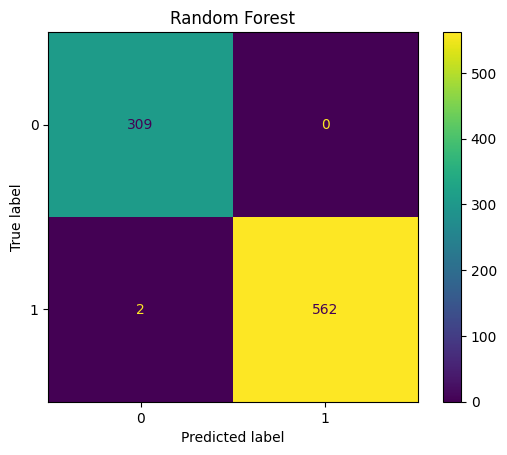

In [ ]:
%%time
rf_model_allf.fit(X_train,y_train)
ConfusionMatrixDisplay.from_estimator(rf_model_allf, X_test, y_test, display_labels=[0,1]).ax_.set_title('Random Forest')

CPU times: user 557 ms, sys: 1.59 ms, total: 558 ms
Wall time: 424 ms


Text(0.5, 1.0, 'K-nearest Neighbors')

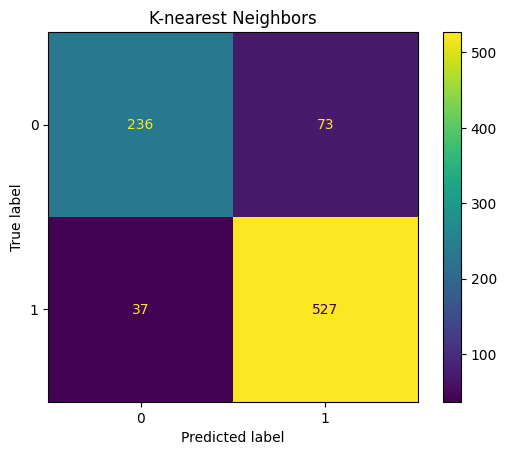

In [ ]:
%%time
knn_model_allf.fit(X_train,y_train)
ConfusionMatrixDisplay.from_estimator(knn_model_allf, X_test, y_test, display_labels=[0,1]).ax_.set_title('K-nearest Neighbors')

In [ ]:
#https://www.kaggle.com/code/allenye66/cnn-confusion-matrix
%%time
cnn_model_allf.fit(X_train,y_train)
#ConfusionMatrixDisplay.from_estimator(cnn_model_allf, X_test, y_test, display_labels=["Does no have HA","Has HA"])

CPU times: user 55.6 s, sys: 2.99 s, total: 58.6 s
Wall time: 56.9 s


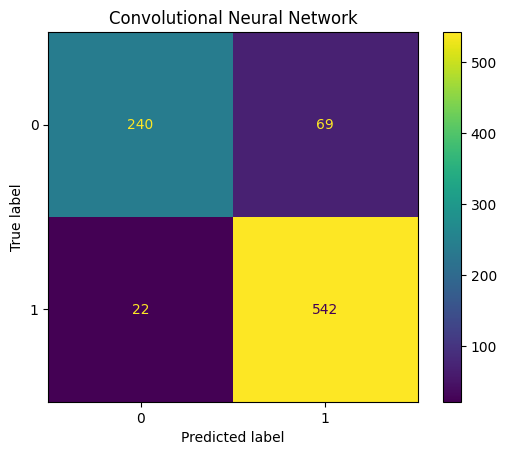

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)#.ax_.set_title()
disp = disp.plot()
disp.ax_.set_title('Convolutional Neural Network')
plt.show()

## code ตอนทำ model Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the hyperparameter grid
svm_param_grid = {'C': [0.1,0.5,1,10,50,100,150], 'gamma': ['scale','auto',0.1,0.01,0.001,0.0001,0.00001],'kernel': ['rbf']}

rf_param_grid = {
   'bootstrap': [True,False],
   'max_depth': [22,50,75,None],
   'max_features': [2, 3 , 4],
   'min_samples_leaf': [3, 4, 5],
   'min_samples_split': range(8, 12),
   'n_estimators': [200, 300, 1000 ,1100]
}
knn_param_grid = {'n_neighbors': np.arange(1, 11),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

In [ ]:
svm_grid_allf = GridSearchCV(SVC(), svm_param_grid ,cv=stratified_kfold, scoring='accuracy',refit=False,verbose = 5)
svm_grid_allf.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.773 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.765 total time=   0.5s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.785 total time=   0.5s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.765 total time=   0.8s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.778 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.646 total time=   1.1s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.645 total time=   1.1s
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.645 total time=   1.1s
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.646 total time=   1.1s
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.646 total time=   1.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.646 total time=   1.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 10, 50, 100, 150],
                         'gamma': ['scale', 'auto', 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=5)

In [ ]:
print(svm_grid_allf.best_params_)
print(svm_grid_allf.best_score_ )

{'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9071731454333365


In [ ]:
rf_grid_allf = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=stratified_kfold, scoring='f1',verbose = 5)
rf_grid_allf.fit(X_train, y_train)

In [ ]:
print(rf_grid_allf.best_params_)
print(rf_grid_allf.best_score_ )

In [ ]:
knn_grid_allf = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=stratified_kfold, scoring='accuracy',verbose = 5)
knn_grid_allf.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.877 total time=   0.1s
[CV 2/5] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.860 total time=   0.1s
[CV 3/5] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.865 total time=   0.1s
[CV 4/5] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.862 total time=   0.1s
[CV 5/5] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.884 total time=   0.1s
[CV 1/5] END algorithm=auto, n_neighbors=1, p=1, weights=distance;, score=0.877 total time=   0.1s
[CV 2/5] END algorithm=auto, n_neighbors=1, p=1, weights=distance;, score=0.860 total time=   0.1s
[CV 3/5] END algorithm=auto, n_neighbors=1, p=1, weights=distance;, score=0.865 total time=   0.1s
[CV 4/5] END algorithm=auto, n_neighbors=1, p=1, weights=distance;, score=0.862 total time=   0.1s
[CV 5/5] END algorithm=auto, n_neighbors=1, p=1, we

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=5)

In [ ]:
print(knn_grid_allf.best_params_)
print(knn_grid_allf.best_score_ )

{'algorithm': 'auto', 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
0.8886061981777484


In [ ]:
from sklearn.model_selection import GridSearchCV
# สร้างและฝึกโมเดล CNN (Convolutional Neural Networks)
def create_cnn_model(u1,u2):
    model = Sequential()
    # เพิ่มเลเยอร์ Convolutional
    # input_dim : 34 จำนวนตาม colum ของ X (จำนวน feature ใน X)
    model.add(Dense(units=u1, input_dim=34, activation='relu'))

    # Dense เคยตั้งเป็น5แล้ว cross_val ออกมาได้แค่ 0.8 กว่าๆ
    model.add(Dense(units=u2, activation='softmax'))  # 3 คลาสใน output layer

    # คอมไพล์โมเดล
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model_all = KerasClassifier(build_fn=create_cnn_model)

cnn_parem_grid = {'u1':[10,11,12],
                  'u2':[2,3,4],
                  'epochs' : [100],
                  'batch_size' : [10,16,20,64]
                  }


<ipython-input-206-3fed00d8d022>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cnn_model_all = KerasClassifier(build_fn=create_cnn_model)


In [ ]:
#รันโคตนาน
ann_grid_allf = GridSearchCV(cnn_model_all ,cnn_parem_grid , cv=stratified_kfold, scoring='f1',verbose = 5)
ann_grid_allf.fit(X,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Epoch 1/100
219/219 [==============================] - 1s 1ms/step - loss: 16.6497 - accuracy: 0.6940
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 4.0467 - accuracy: 0.7401
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 2.7321 - accuracy: 0.7576
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 1.9540 - accuracy: 0.7897
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 1.4833 - accuracy: 0.8032
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 1.4314 - accuracy: 0.8138
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 1.5767 - accuracy: 0.8080
Epoch 8/100
219/219 [==============================] - 0s 1ms/step - loss: 1.1150 - accuracy: 0.8304
Epoch 9/100
219/219 [==============================] - 0s 1ms/step - loss: 1.1338 - accuracy: 0.8246
Epoch 10/100
219/219 [======

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 270, in predict
    return self.classes_[classes]
IndexError: index 2 is out of bounds for 

Streaming output truncated to the last 5000 lines.
219/219 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.8782
Epoch 27/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3887 - accuracy: 0.8668
Epoch 28/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.8688
Epoch 29/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8685
Epoch 30/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3567 - accuracy: 0.8711
Epoch 31/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3889 - accuracy: 0.8605
Epoch 32/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3923 - accuracy: 0.8656
Epoch 33/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3434 - accuracy: 0.8845
Epoch 34/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3678 - accuracy: 0.8716
Epoch 35/100
219/219 [======================

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 270, in predict
    return self.classes_[classes]
IndexError: index 2 is out of bounds for 

219/219 [==============================] - 1s 1ms/step - loss: 34.6337 - accuracy: 0.5390
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 6.4414 - accuracy: 0.7011
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 3.4703 - accuracy: 0.7178
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 2.2040 - accuracy: 0.7344
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 1.6309 - accuracy: 0.7619
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 1.3783 - accuracy: 0.7794
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 1.1975 - accuracy: 0.8003
Epoch 8/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9985 - accuracy: 0.8123
Epoch 9/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9237 - accuracy: 0.8143
Epoch 10/100
219/219 [==============================] - 0s 1ms/step - loss: 0.8835 - accuracy: 0.8106


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 270, in predict
    return self.classes_[classes]
IndexError: index 2 is out of bounds for 

219/219 [==============================] - 1s 2ms/step - loss: 15.2732 - accuracy: 0.6722
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 7.7888 - accuracy: 0.6954
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 4.5442 - accuracy: 0.7284
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 2.9213 - accuracy: 0.7771
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 2.0665 - accuracy: 0.8043
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 1.7967 - accuracy: 0.8192
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 1.6035 - accuracy: 0.8335
Epoch 8/100
219/219 [==============================] - 0s 1ms/step - loss: 1.3698 - accuracy: 0.8358
Epoch 9/100
219/219 [==============================] - 0s 1ms/step - loss: 1.3849 - accuracy: 0.8350
Epoch 10/100
219/219 [==============================] - 0s 1ms/step - loss: 1.2685 - accuracy: 0.8235


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 270, in predict
    return self.classes_[classes]
IndexError: index 2 is out of bounds for 

Streaming output truncated to the last 5000 lines.
175/175 [==============================] - 0s 2ms/step - loss: 1.1680 - accuracy: 0.8333
Epoch 27/100
175/175 [==============================] - 0s 1ms/step - loss: 1.0422 - accuracy: 0.8304
Epoch 28/100
175/175 [==============================] - 0s 1ms/step - loss: 0.8066 - accuracy: 0.8622
Epoch 29/100
175/175 [==============================] - 0s 1ms/step - loss: 0.7477 - accuracy: 0.8588
Epoch 30/100
175/175 [==============================] - 0s 2ms/step - loss: 0.7357 - accuracy: 0.8525
Epoch 31/100
175/175 [==============================] - 0s 2ms/step - loss: 0.8349 - accuracy: 0.8350
Epoch 32/100
175/175 [==============================] - 0s 2ms/step - loss: 0.7963 - accuracy: 0.8616
Epoch 33/100
175/175 [==============================] - 0s 2ms/step - loss: 0.7924 - accuracy: 0.8516
Epoch 34/100
175/175 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.8528
Epoch 35/100
175/175 [======================

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 270, in predict
    return self.classes_[classes]
IndexError: index 2 is out of bounds for 

175/175 [==============================] - 1s 2ms/step - loss: 17.4004 - accuracy: 0.5594
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 2.6256 - accuracy: 0.6755
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 1.6912 - accuracy: 0.7304
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 1.4332 - accuracy: 0.7416
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2201 - accuracy: 0.7720
Epoch 6/100
175/175 [==============================] - 0s 1ms/step - loss: 1.0837 - accuracy: 0.7863
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 0.9477 - accuracy: 0.7975
Epoch 8/100
175/175 [==============================] - 0s 2ms/step - loss: 0.8511 - accuracy: 0.8049
Epoch 9/100
175/175 [==============================] - 0s 2ms/step - loss: 0.7437 - accuracy: 0.8247
Epoch 10/100
175/175 [==============================] - 0s 2ms/step - loss: 0.7424 - accuracy: 0.8281


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 270, in predict
    return self.classes_[classes]
IndexError: index 2 is out of bounds for 

55/55 [==============================] - 1s 2ms/step - loss: 97.5024 - accuracy: 0.5808
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 25.5261 - accuracy: 0.3404
Epoch 3/100
55/55 [==============================] - 0s 2ms/step - loss: 9.4155 - accuracy: 0.3510
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 6.4140 - accuracy: 0.3599
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 4.7817 - accuracy: 0.4590
Epoch 6/100
55/55 [==============================] - 0s 2ms/step - loss: 3.6253 - accuracy: 0.6350
Epoch 7/100
55/55 [==============================] - 0s 1ms/step - loss: 2.6268 - accuracy: 0.6393
Epoch 8/100
55/55 [==============================] - 0s 2ms/step - loss: 1.8775 - accuracy: 0.6404
Epoch 9/100
55/55 [==============================] - 0s 1ms/step - loss: 1.3240 - accuracy: 0.6407
Epoch 10/100
55/55 [==============================] - 0s 2ms/step - loss: 1.1932 - accuracy: 0.6398
Epoch 11/100
55/55 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 270, in predict
    return self.classes_[classes]
IndexError: index 3 is out of bounds for 

55/55 [==============================] - 1s 2ms/step - loss: 45.8570 - accuracy: 0.5112
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 12.4848 - accuracy: 0.5037
Epoch 3/100
55/55 [==============================] - 0s 2ms/step - loss: 4.2906 - accuracy: 0.6828
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 2.1429 - accuracy: 0.7054
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 1.3115 - accuracy: 0.7215
Epoch 6/100
55/55 [==============================] - 0s 1ms/step - loss: 1.0702 - accuracy: 0.7470
Epoch 7/100
55/55 [==============================] - 0s 1ms/step - loss: 0.9382 - accuracy: 0.7579
Epoch 8/100
55/55 [==============================] - 0s 2ms/step - loss: 0.8636 - accuracy: 0.7650
Epoch 9/100
55/55 [==============================] - 0s 2ms/step - loss: 0.7690 - accuracy: 0.7794
Epoch 10/100
55/55 [==============================] - 0s 2ms/step - loss: 0.7489 - accuracy: 0.7765
Epoch 11/100
55/55 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 270, in predict
    return self.classes_[classes]
IndexError: index 3 is out of bounds for 

55/55 [==============================] - 0s 1ms/step - loss: 36.9517 - accuracy: 0.3433
Epoch 2/100
55/55 [==============================] - 0s 1ms/step - loss: 11.8628 - accuracy: 0.5702
Epoch 3/100
55/55 [==============================] - 0s 2ms/step - loss: 8.1880 - accuracy: 0.6011
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 6.0750 - accuracy: 0.6258
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 4.4482 - accuracy: 0.6330
Epoch 6/100
55/55 [==============================] - 0s 2ms/step - loss: 3.0910 - accuracy: 0.6352
Epoch 7/100
55/55 [==============================] - 0s 2ms/step - loss: 2.0032 - accuracy: 0.6367
Epoch 8/100
55/55 [==============================] - 0s 2ms/step - loss: 1.7598 - accuracy: 0.6375
Epoch 9/100
55/55 [==============================] - 0s 2ms/step - loss: 1.6339 - accuracy: 0.6404
Epoch 10/100
55/55 [==============================] - 0s 2ms/step - loss: 1.5346 - accuracy: 0.6401
Epoch 11/100
55/55 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 270, in predict
    return self.classes_[classes]
IndexError: index 2 is out of bounds for 

55/55 [==============================] - 1s 2ms/step - loss: 215.9060 - accuracy: 0.1126
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 25.6319 - accuracy: 0.6018
Epoch 3/100
55/55 [==============================] - 0s 2ms/step - loss: 11.6545 - accuracy: 0.7178
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 9.0278 - accuracy: 0.7445
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 7.4879 - accuracy: 0.7451
Epoch 6/100
55/55 [==============================] - 0s 1ms/step - loss: 6.1741 - accuracy: 0.7330
Epoch 7/100
55/55 [==============================] - 0s 2ms/step - loss: 5.0533 - accuracy: 0.7253
Epoch 8/100
55/55 [==============================] - 0s 2ms/step - loss: 4.1795 - accuracy: 0.7181
Epoch 9/100
55/55 [==============================] - 0s 2ms/step - loss: 3.5759 - accuracy: 0.7196
Epoch 10/100
55/55 [==============================] - 0s 2ms/step - loss: 3.1902 - accuracy: 0.7115
Epoch 11/100
55/5

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 270, in predict
    return self.classes_[classes]
IndexError: index 2 is out of bounds for 

55/55 [==============================] - 1s 2ms/step - loss: 18.0368 - accuracy: 0.5276
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 6.8069 - accuracy: 0.7058
Epoch 3/100
55/55 [==============================] - 0s 2ms/step - loss: 5.6756 - accuracy: 0.7156
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 4.8603 - accuracy: 0.7127
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 4.1349 - accuracy: 0.7176
Epoch 6/100
55/55 [==============================] - 0s 2ms/step - loss: 3.5963 - accuracy: 0.7156
Epoch 7/100
55/55 [==============================] - 0s 2ms/step - loss: 3.1525 - accuracy: 0.7287
Epoch 8/100
55/55 [==============================] - 0s 2ms/step - loss: 2.7648 - accuracy: 0.7253
Epoch 9/100
55/55 [==============================] - 0s 2ms/step - loss: 2.5602 - accuracy: 0.7290
Epoch 10/100
55/55 [==============================] - 0s 2ms/step - loss: 2.2722 - accuracy: 0.7362
Epoch 11/100
55/55 [

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 270, in predict
    return self.classes_[classes]
IndexError: index 2 is out of bounds for 

55/55 [==============================] - 1s 1ms/step - loss: 37.4879 - accuracy: 0.3598
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 7.6205 - accuracy: 0.5348
Epoch 3/100
55/55 [==============================] - 0s 2ms/step - loss: 5.4587 - accuracy: 0.5867
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 4.4142 - accuracy: 0.6007
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 3.5990 - accuracy: 0.6096
Epoch 6/100
55/55 [==============================] - 0s 2ms/step - loss: 2.8272 - accuracy: 0.6187
Epoch 7/100
55/55 [==============================] - 0s 2ms/step - loss: 2.0474 - accuracy: 0.6288
Epoch 8/100
55/55 [==============================] - 0s 2ms/step - loss: 1.5541 - accuracy: 0.6331
Epoch 9/100
55/55 [==============================] - 0s 2ms/step - loss: 1.3366 - accuracy: 0.6365
Epoch 10/100
55/55 [==============================] - 0s 2ms/step - loss: 1.2895 - accuracy: 0.6371
Epoch 11/100
55/55 [

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 270, in predict
    return self.classes_[classes]
IndexError: index 2 is out of bounds for 

55/55 [==============================] - 1s 2ms/step - loss: 26.2533 - accuracy: 0.5014
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 8.2241 - accuracy: 0.6771
Epoch 3/100
55/55 [==============================] - 0s 2ms/step - loss: 5.7900 - accuracy: 0.6991
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 3.8472 - accuracy: 0.7146
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 2.9911 - accuracy: 0.7458
Epoch 6/100
55/55 [==============================] - 0s 2ms/step - loss: 2.4840 - accuracy: 0.7619
Epoch 7/100
55/55 [==============================] - 0s 2ms/step - loss: 1.9077 - accuracy: 0.7665
Epoch 8/100
55/55 [==============================] - 0s 2ms/step - loss: 1.5176 - accuracy: 0.7868
Epoch 9/100
55/55 [==============================] - 0s 2ms/step - loss: 1.3313 - accuracy: 0.7891
Epoch 10/100
55/55 [==============================] - 0s 2ms/step - loss: 1.1900 - accuracy: 0.8011
Epoch 11/100
55/55 [

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 270, in predict
    return self.classes_[classes]
IndexError: index 3 is out of bounds for 

55/55 [==============================] - 1s 2ms/step - loss: 31.9163 - accuracy: 0.4857
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 6.2245 - accuracy: 0.7149
Epoch 3/100
55/55 [==============================] - 0s 2ms/step - loss: 3.2844 - accuracy: 0.7241
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 2.7158 - accuracy: 0.7456
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 2.4013 - accuracy: 0.7524
Epoch 6/100
55/55 [==============================] - 0s 2ms/step - loss: 2.1226 - accuracy: 0.7524
Epoch 7/100
55/55 [==============================] - 0s 2ms/step - loss: 1.8494 - accuracy: 0.7628
Epoch 8/100
55/55 [==============================] - 0s 2ms/step - loss: 1.5952 - accuracy: 0.7628
Epoch 9/100
55/55 [==============================] - 0s 2ms/step - loss: 1.3670 - accuracy: 0.7653
Epoch 10/100
55/55 [==============================] - 0s 2ms/step - loss: 1.1998 - accuracy: 0.7691
Epoch 11/100
55/55 [

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.8308703         nan 0.90122035 0.8824251  0.88493805 0.85562281
 0.87507987        nan        nan 0.89480359 0.87829718 0.87851866
 0.84574283 0.86912051 0.8468996  0.87691263 0.87898421        nan
 0.85880624        nan        nan 0.87944318        nan        nan
 0.87988535 0.86821516        nan]
  warnings.warn(


273/273 [==============================] - 1s 1ms/step - loss: 10.1772 - accuracy: 0.6496
Epoch 2/100
273/273 [==============================] - 0s 1ms/step - loss: 3.6015 - accuracy: 0.6658
Epoch 3/100
273/273 [==============================] - 0s 1ms/step - loss: 1.9661 - accuracy: 0.7009
Epoch 4/100
273/273 [==============================] - 0s 1ms/step - loss: 1.3429 - accuracy: 0.7401
Epoch 5/100
273/273 [==============================] - 0s 1ms/step - loss: 0.9936 - accuracy: 0.7692
Epoch 6/100
273/273 [==============================] - 0s 1ms/step - loss: 0.8860 - accuracy: 0.7894
Epoch 7/100
273/273 [==============================] - 0s 1ms/step - loss: 0.8080 - accuracy: 0.8176
Epoch 8/100
273/273 [==============================] - 0s 1ms/step - loss: 0.7622 - accuracy: 0.8334
Epoch 9/100
273/273 [==============================] - 0s 1ms/step - loss: 0.6034 - accuracy: 0.8405
Epoch 10/100
273/273 [==============================] - 0s 1ms/step - loss: 0.5651 - accuracy: 0.8416


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7c5f320e3c10>,
             param_grid={'batch_size': [16, 20, 64], 'epochs': [100],
                         'u1': [10, 11, 12], 'u2': [2, 3, 4]},
             scoring='accuracy', verbose=5)

In [ ]:
print(ann_grid_allf.best_params_)
print(ann_grid_allf.best_score_)

{'batch_size': 16, 'epochs': 100, 'u1': 10, 'u2': 4}
0.9012203516294124


ค่าที่ได้จาก model tunning เอามาใช้ตั้งค่าโมเดลตอนทดสอบจริง